# Install packages

In [1]:
import pandas as pd
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data and select features

def prepare_df(csv_file):
    df = pd.read_csv(csv_file)
    df_main = df.copy()
    df_main.columns = [x.strip() for x in df_main.columns]
    df_main = df_main.set_index(['name','artist'])
    df_main = df_main.drop(columns=['key','duration_ms','type', 'id', 'html'])
    return df_main
    
prepare_df('df_audio_features_5000')


,,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
name,artist,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.6580,0.25900,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,4
Saudade De Bahia,Antônio Carlos Jobim,0.7420,0.39900,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,4
"Canta Canta, Minha Gente",Martinho Da Vila,0.8510,0.73000,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,4
Mulher Eu Sei,Chico César,0.7050,0.05020,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,4
Rosa Morena,Kurt Elling,0.6510,0.11900,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,4
...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,4
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.1880,0.10100,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,4
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,3


# Save returned DF as a new DF

In [3]:
df_main = prepare_df('df_audio_features_5000')

In [4]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5235 entries, ('Se Eu Quiser Falar Com Deus                                                                                                                                                      ', 'Gilberto Gil                                    ') to ('Ravel: Boléro, M. 81                                                                                                                                                           ', 'Maurice Ravel                                   ')
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5235 non-null   float64
 1   energy            5235 non-null   float64
 2   loudness          5235 non-null   float64
 3   mode              5235 non-null   int64  
 4   speechiness       5235 non-null   float64
 5   acousticness      5235 non-null   float64
 6   instrumentalness  5235 non-null   float64
 7   livene

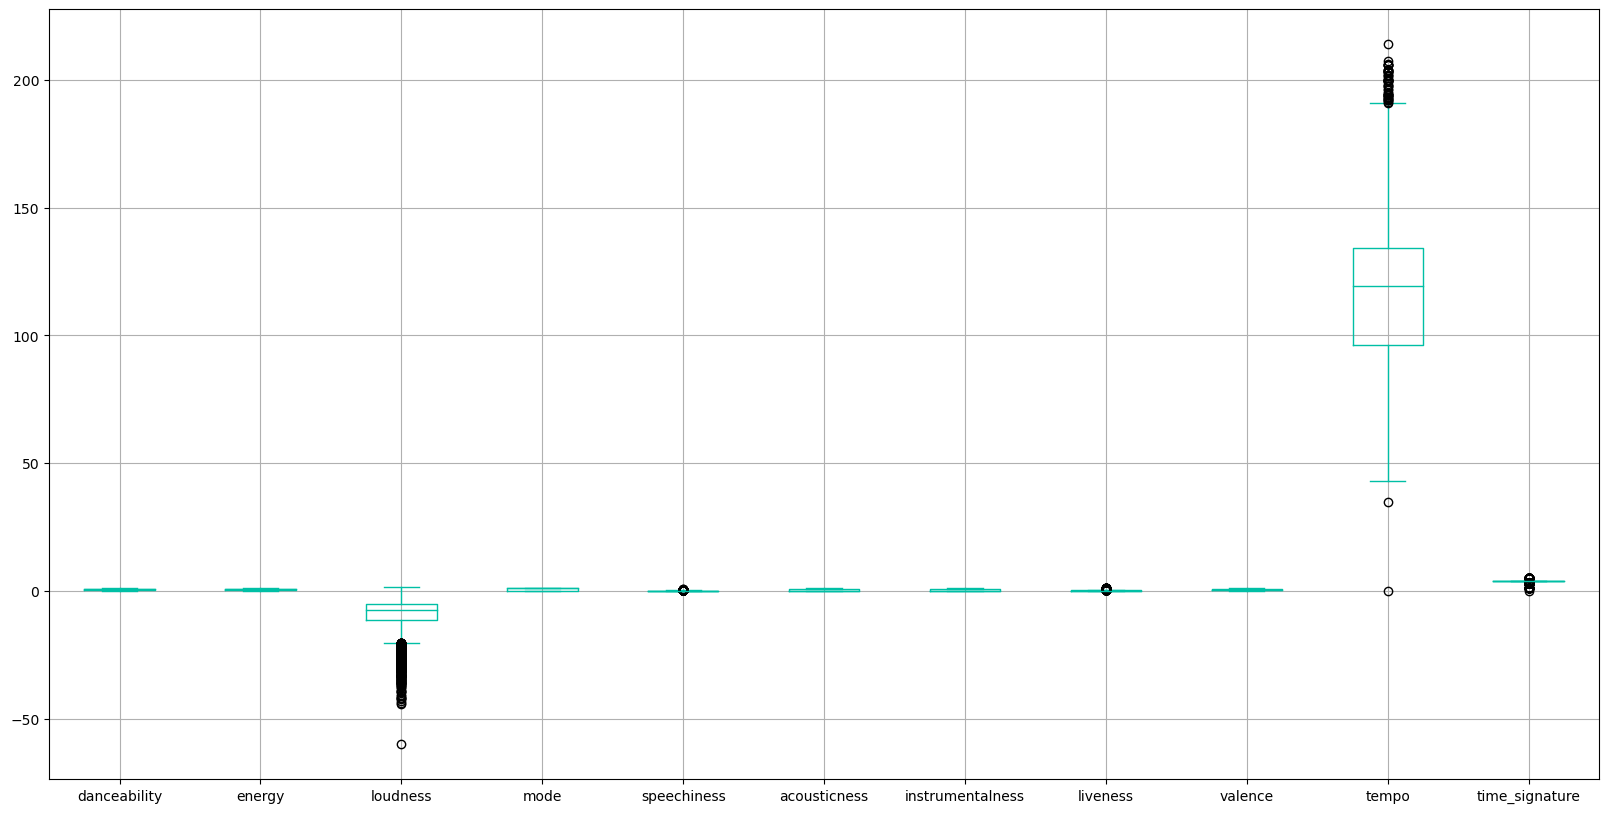

In [5]:
df_main[['danceability','energy','loudness', 'mode','speechiness','acousticness','instrumentalness', 
           'liveness', 'valence','tempo','time_signature']].boxplot(figsize=(20,10), color = '#00BFA5')
plt.show()

In [8]:
#df_main[[ 'danceability', 'mode','acousticness', 'instrumentalness', 
#           'energy','valence'
#           ]].boxplot(figsize=(20,10), color = '#00BFA5')
#plt.show()


# Preprocessing

involves scaling data, to normalise values in each column so there is no skewness.  SOme columns are even while columns have far outliers. Using minmax and robust to scale these.

In [9]:
df_minmax = df_main[['danceability', 'mode','acousticness', 'instrumentalness','energy','valence']]

In [33]:
df_robust = df_main[list(set(df_main.columns) - set(df_minmax.columns))]


In [34]:
df_robust 

,,tempo,time_signature,liveness,speechiness,loudness
name,artist,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,110.376,4,0.9750,0.0705,-13.141
Saudade De Bahia,Antônio Carlos Jobim,125.039,4,0.1070,0.0346,-12.646
"Canta Canta, Minha Gente",Martinho Da Vila,93.698,4,0.1240,0.3470,-11.048
Mulher Eu Sei,Chico César,106.802,4,0.3860,0.0471,-18.115
Rosa Morena,Kurt Elling,120.941,4,0.1040,0.0380,-19.807
...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,87.906,4,0.0832,0.0473,-23.390
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,83.134,4,0.0694,0.0442,-21.873
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,71.573,3,0.0772,0.0434,-42.959


In [35]:
def preprocessing_minmax(df):
    transformer = MinMaxScaler()
    transformer.fit(df)
    normal_df = transformer.transform(df)
    normal_df = pd.DataFrame(normal_df, index=df.index, columns=df.columns)
    return normal_df



In [39]:
minmax_df = preprocessing_minmax(df_minmax)

In [37]:
def preprocessing_robust(df):
    transformer = RobustScaler()
    transformer.fit(df)
    robust_df = transformer.transform(df)
    robust_df = pd.DataFrame(robust_df, index=df.index, columns=df.columns)
    return robust_df


In [40]:
robust_df = preprocessing(df_robust)

In [42]:
scaled_df = pd.concat([minmax_df, robust_df], axis=1)

In [43]:
scaled_df

,,danceability,mode,acousticness,instrumentalness,energy,valence,tempo,time_signature,liveness,speechiness,loudness
name,artist,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.0,0.696787,0.000060,0.25900,0.310660,0.515800,0.8,0.987842,0.076797,0.763897
Saudade De Bahia,Antônio Carlos Jobim,0.767322,1.0,0.217871,0.000002,0.39900,0.703553,0.584322,0.8,0.108409,0.037691,0.771967
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,1.0,0.454819,0.000064,0.73000,0.918782,0.437862,0.8,0.125633,0.377996,0.798018
Mulher Eu Sei,Chico César,0.729059,1.0,0.882530,0.000041,0.05020,0.531980,0.499098,0.8,0.391084,0.051307,0.682811
Rosa Morena,Kurt Elling,0.673216,1.0,0.919679,0.000348,0.11900,0.408122,0.565171,0.8,0.105370,0.041394,0.655228
...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.208893,1.0,0.920683,0.725888,0.06940,0.066497,0.410795,0.8,0.084296,0.051525,0.596818
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.194416,1.0,0.858434,0.432487,0.10100,0.036041,0.388495,0.8,0.070314,0.048148,0.621548
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.061634,1.0,0.954819,0.983756,0.00093,0.034924,0.334469,0.6,0.078217,0.047277,0.277803


In [ ]:
#Let us visualise the distribution of songs based on each feature upon the scaled dataframe. 
#songs are moderately danceable,energetic and happy. 

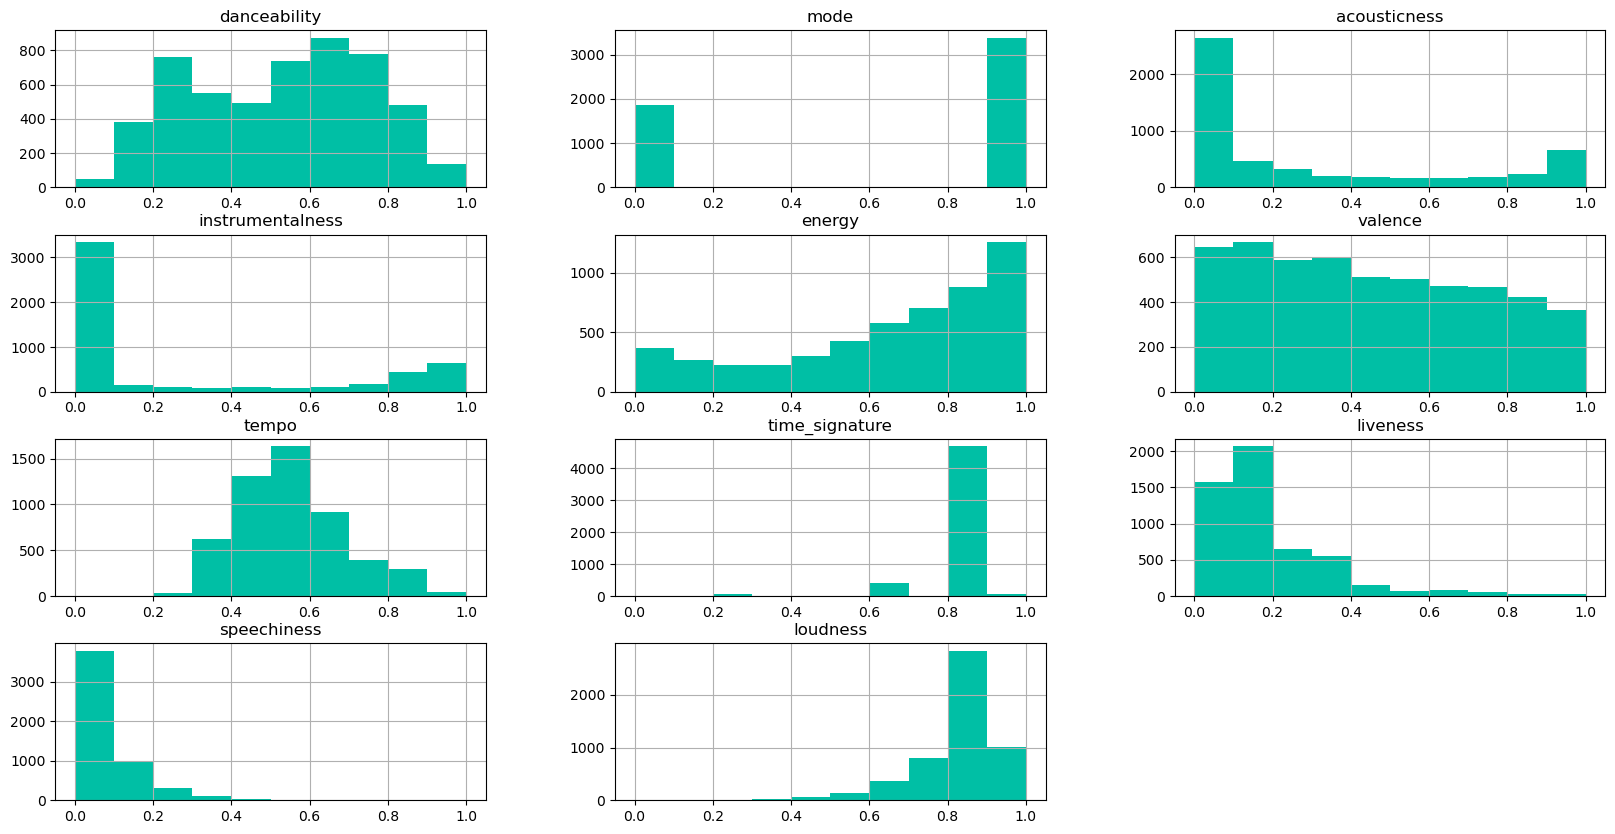

In [44]:
scaled_df.hist(figsize=(20,10), color = '#00BFA5')
plt.show()

# Initialize the centroids

#Initial clustering using fit , predict. 

In [89]:
def clustering_model(scaled_df, n_clusters):
    clustering = KMeans(n_clusters, init='k-means++', random_state=42)
    clustering.fit(scaled_df)
    scaled_df['cluster'] = clustering.predict(scaled_df)
    return scaled_df

In [90]:
c_m_df = clustering_model(scaled_df, 20)
sns.countplot(x=c_m_df["cluster"])

C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot:xlabel='cluster', ylabel='count'>

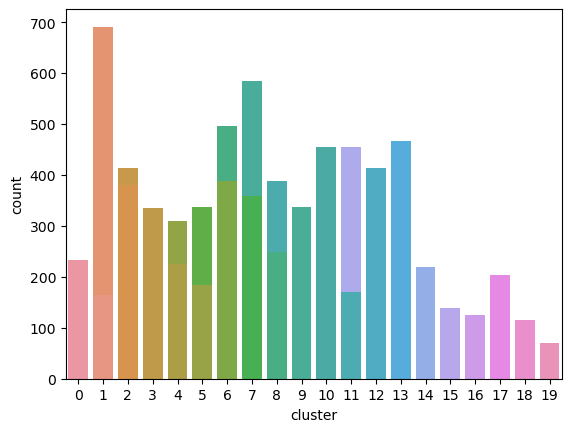

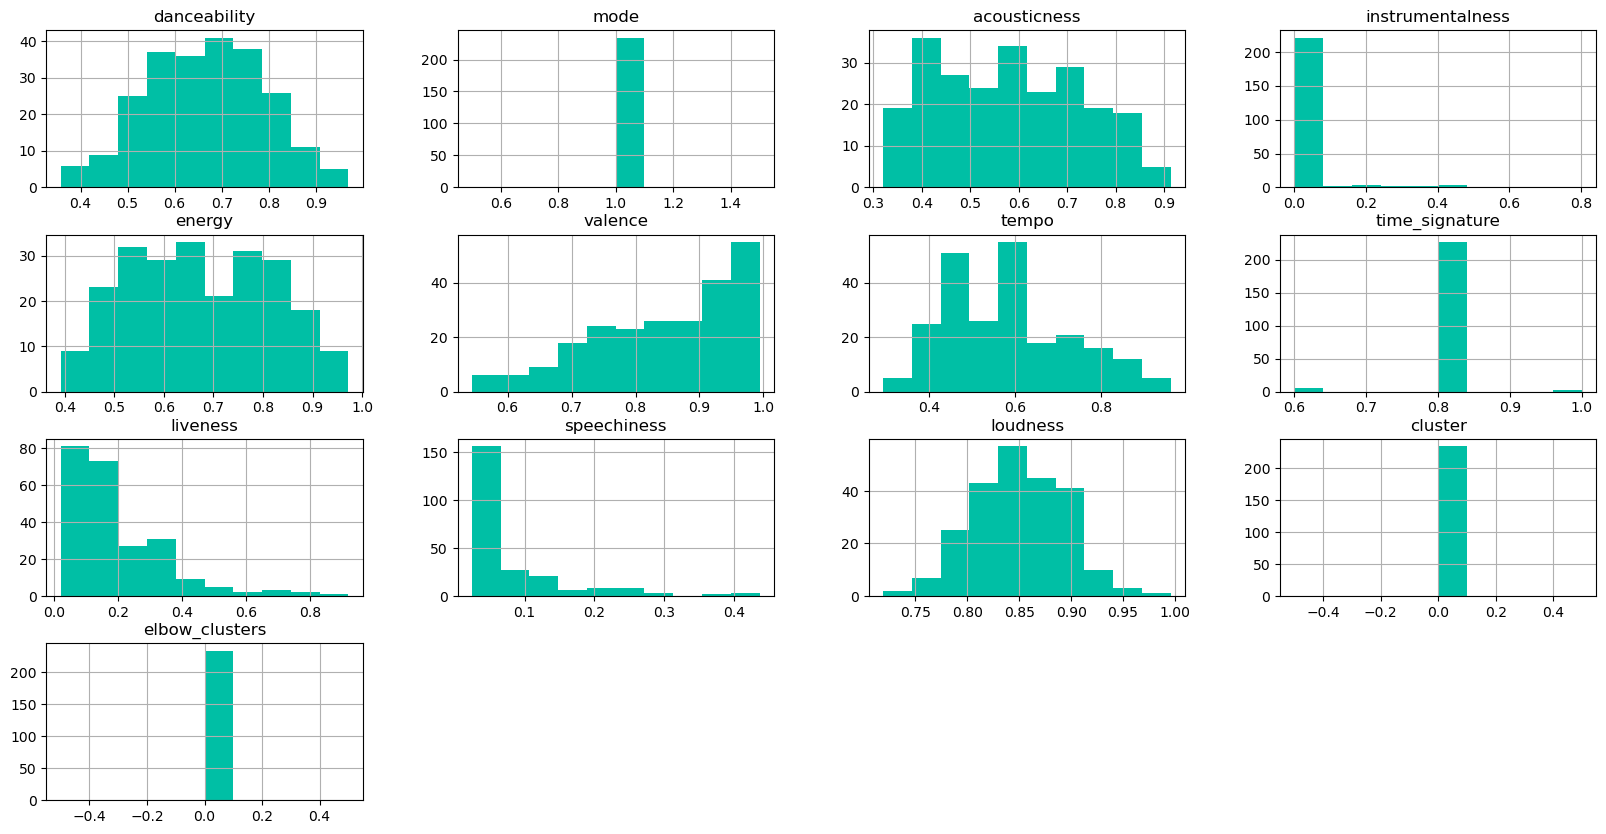

In [91]:
cluster_zero = c_m_df.loc[c_m_df["cluster"] == 0, :]
cluster_zero.hist(figsize=(20,10), color = '#00BFA5')
plt.show()



# Find optimum number of clusters with ineria and silhouette score

In [95]:
def find_best_clusters(scaled_df, n_clusters):
    inertia_list = []
    K = range(2, 51)
    for k in K:
        myKMeans = KMeans(n_clusters=k, init = 'k-means++', random_state=42)
        myKMeans.fit(scaled_df)
        inertia_list.append(myKMeans.inertia_)
    return inertia_list
    

In [96]:
inertia_list = find_best_clusters(scaled_df, 20)
inertia_list

C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\deepa\anaconda3\lib\site-packages\sklearn\clust

[126340.9487608839,
 84284.94506631602,
 60657.91834904982,
 43372.36645275522,
 31178.31794871316,
 24833.938296929835,
 18014.268294095695,
 13578.084026583268,
 10793.421218734216,
 9214.712638052382,
 7680.592937655836,
 6382.331987534895,
 5280.590999940988,
 3872.8724490844925,
 3035.5735149699885,
 2220.021319085512,
 1515.0625868494344,
 1007.9368658270773,
 633.7003352168247,
 623.1508208197605,
 617.5670421457909,
 602.8419072033696,
 596.680818583461,
 597.1052213359058,
 593.0140924892073,
 580.135935714459,
 580.0055591375042,
 572.2848570079943,
 566.5001813291296,
 564.2306856109187,
 554.2098379980371,
 551.5973614206061,
 549.8892102709203,
 548.6844133886441,
 541.4752077782892,
 534.3555821656032,
 531.799556018084,
 531.1262470990114,
 525.8597849701206,
 517.8846781832278,
 515.0710903304366,
 515.1227597864852,
 511.7404895135065,
 505.0316251436208,
 504.08700596635805,
 499.3193351663615,
 496.0138041081623,
 493.03480665587915,
 486.71316881095333]

In [97]:
def generate_elbow_plot(inertia_list):
    plt.plot(inertia_list,'o-', color = 'blue')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\deepa\anaconda3\lib\site-packages\sklearn\clust

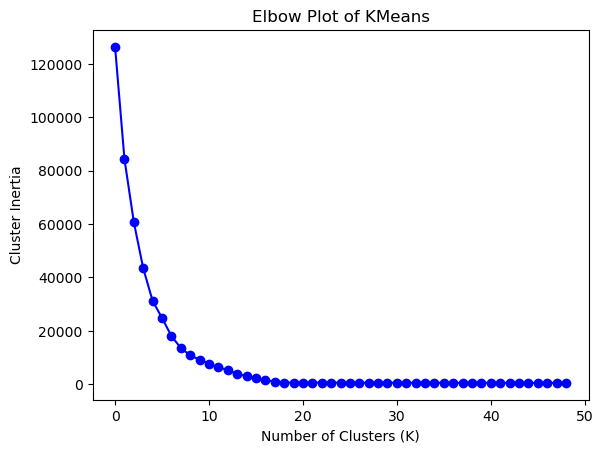

In [98]:
inertia_list = find_best_clusters(scaled_df, 20)
generate_elbow_plot(inertia_list)

In [99]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [100]:
def find_sil_scores(scaled_df, n_clusters):
    silhouette_list = []
    K = range(2, n_clusters)
    for k in K:
        myKMeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        myKMeans.fit(scaled_df)
    # compute silhouette score
    sil_score = silhouette_score(scaled_df, myKMeans.labels_)
    silhouette_list.append(sil_score)
    return silhouette_list


In [101]:
sil_list = find_sil_scores(scaled_df, 15)
sil_list

C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\deepa\anaconda3\lib\site-packages\sklearn\clust

[0.7547015770348815]

# Create a final KMeans model

In [102]:
def clustering_model(scaled_df, n_clusters):
    clustering = KMeans(n_clusters, init='k-means++', random_state=42)
    clustering.fit(scaled_df)
    scaled_df['elbow_clusters'] = clustering.predict(scaled_df)
    return scaled_df

In [103]:
final_df = clustering_model(scaled_df, 15)


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [104]:
final_df

,,danceability,mode,acousticness,instrumentalness,energy,valence,tempo,time_signature,liveness,speechiness,loudness,cluster,elbow_clusters
name,artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.0,0.696787,0.000060,0.25900,0.310660,0.515800,0.8,0.987842,0.076797,0.763897,14,5
Saudade De Bahia,Antônio Carlos Jobim,0.767322,1.0,0.217871,0.000002,0.39900,0.703553,0.584322,0.8,0.108409,0.037691,0.771967,2,11
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,1.0,0.454819,0.000064,0.73000,0.918782,0.437862,0.8,0.125633,0.377996,0.798018,0,0
Mulher Eu Sei,Chico César,0.729059,1.0,0.882530,0.000041,0.05020,0.531980,0.499098,0.8,0.391084,0.051307,0.682811,5,6
Rosa Morena,Kurt Elling,0.673216,1.0,0.919679,0.000348,0.11900,0.408122,0.565171,0.8,0.105370,0.041394,0.655228,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.208893,1.0,0.920683,0.725888,0.06940,0.066497,0.410795,0.8,0.084296,0.051525,0.596818,7,13
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.194416,1.0,0.858434,0.432487,0.10100,0.036041,0.388495,0.8,0.070314,0.048148,0.621548,1,9
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.061634,1.0,0.954819,0.983756,0.00093,0.034924,0.334469,0.6,0.078217,0.047277,0.277803,7,13


In [77]:
sns.countplot(x=final_df["elbow_clusters"])

<AxesSubplot:xlabel='elbow_clusters', ylabel='count'>

In [78]:
df_to_plot = final_df.copy()
df_to_plot = df_to_plot.reset_index(level=['name','artist'])
df_to_plot.head(3)

,name,artist,danceability,mode,acousticness,instrumentalness,energy,valence,tempo,time_signature,liveness,speechiness,loudness,cluster,elbow_clusters
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.680455,0.0,0.696787,0.000060,0.259,0.310660,0.515800,0.8,0.987842,0.076797,0.763897,15,12
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.767322,1.0,0.217871,0.000002,0.399,0.703553,0.584322,0.8,0.108409,0.037691,0.771967,8,7
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.880041,1.0,0.454819,0.000064,0.730,0.918782,0.437862,0.8,0.125633,0.377996,0.798018,0,0


In [108]:
df_genre = df_to_plot.groupby('elbow_clusters').apply(lambda x: x.sample(3))
df_genre.rename(columns= {'cluster':'old_cluster'}, inplace = True)
df_genre

name  \
elbow_clusters                                                           
0              3153  Morning Sun                                   ...   
               126   Tanto Mar                                     ...   
               86    Pagode da Saidera                             ...   
1              5144  Symphony in G Minor, Op. 6, No. 6, W. C12: I. ...   
               5190  Sinfonietta: Andante con moto. Allegretto     ...   
               1505  Say My Name                                   ...   
2              2280  Hotel (feat. R. Kelly)                        ...   
               4727  Rette Mich                                    ...   
               1747  thank u, next                                 ...   
3              2874  Byte                                          ...   
               3871  Morbid Way to Die - remastered 2001           ...   
               3826  Inner Incineration                            ...   
4              3070  Teenage Crime - Radio Edit                    ...   
               2824  Toca (feat. Timmy Trumpet & KSHMR)            ...   
               1743  Too Good At Goodbyes                          ...   
5              2685  Sweet Nothing (feat. Florence Welch)          ...   
               2244  Look At Me Now                                ...   
               2649  Don't You Worry Child (Radio Edit) [feat. John...   
6              2893  All My Friends - Radio Edit                   ...   
               2121  Yesterday                                     ...   
               1907  Blástjarnan þótt skarti skær                  ...   
7              1060  Hey Jude                                      ...   
               684   Strip That Down                               ...   
               3150  Book of Rules                                 ...   
8              1643  I Know You Want Me (Calle Ocho)               ...   
               4647  Hot Sauce                                     ...   
               2274  Remember the Name (feat. Styles of Beyond)    ...   
9              3681  Veil of Maya                                  ...   
               301   Natural Life                                  ...   
               2915  Like I Do                                     ...   
10             5194  Six Pieces For Orchestra, Op.6 - Original Vers...   
               2377  Gianni Schicchi: "O mio babbino caro"         ...   
               1449  A Whole New World (Aladdin's Theme)           ...   
11             3049  Here We Go (Hey Boy, Hey Girl)                ...   
               3494  Ritual of Infinity                            ...   
               3869  Jesters of Recession                          ...   
12             232   Zamba del carnaval                            ...   
               197   Sushi                                         ...   
               506   Ms. Ho                                        ...   
13             3416  Death Metal                                   ...   
               3433  Infected                                      ...   
               4138  March to Die                                  ...   
14             2886  Bomb A Drop                                   ...   
               1201  What's Going On                               ...   
               137   Taj Mahal                                     ...   

                                                               artist  \
elbow_clusters                                                          
0              3153  Al Barry                                           
               126   Chico Buarque                                      
               86    Martinho Da Vila                                   
1              5144  Johann Christian Bach                              
               5190  Leoš Janáček                                       
               1505  Destiny's Child                                    
2  

In [157]:
current_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
desired_labels = ['hits_pop', 'classical', 'house_dj', 'death_metal', 'electronic', 'modern_pop', 'symphonies', 
                  'jazz_pop',
                 'hip_hop', 'heavy_metal', 'instrumental' , 'extreme_rock', 'latin_pop', 'hard_rock', 'edm']
# create a dictionary for your corresponding values
map_dict = dict(zip(current_labels, desired_labels))
map_dict

# alternatively you can map to a new column if you want to preserve the old values
df_genre['new_labels'] = df_genre['elbow_clusters'].map(map_dict)
 

In [158]:
hits_pop = df_genre.loc[df_genre["new_labels"] == "hits_pop", :]

In [156]:
hits_pop

name  \
elbow_clusters                                                           
0              3153  Morning Sun                                   ...   
               126   Tanto Mar                                     ...   
               86    Pagode da Saidera                             ...   

                                                               artist  \
elbow_clusters                                                          
0              3153  Al Barry                                           
               126   Chico Buarque                                      
               86    Martinho Da Vila                                   

                     danceability  mode  acousticness  instrumentalness  \
elbow_clusters                                                            
0              3153      0.676319   1.0      0.415663          0.000238   
               126       0.441572   1.0      0.647590          0.000027   
               86        0.603930   1.0      0.725904          0.000001   

                     energy   valence     tempo  time_signature  liveness  \
elbow_clusters                                                              
0              3153   0.395  0.937056  0.528431             0.8  0.134752   
               126    0.504  0.898477  0.842694             0.6  0.180344   
               86     0.792  0.952284  0.484467             0.8  0.206687   

                     speechiness  loudness  old_cluster  elbow_clusters  \
elbow_clusters                                                            
0              3153     0.082353  0.779450            0               0   
               126      0.065686  0.846076            0               0   
               86       0.112200  0.804604            0               0   

                    new_labels  
elbow_clusters                  
0              3153   hits_pop  
               126    hits_pop  
               86     hits_pop

In [153]:
df_to_plot['new_labels'] = df_to_plot['elbow_clusters'].map(map_dict)


In [133]:
sns.countplot(x=df_to_plot["new_labels"])

<AxesSubplot:xlabel='new_labels', ylabel='count'>

In [134]:
df_to_plot

,name,artist,danceability,mode,acousticness,instrumentalness,energy,valence,tempo,time_signature,liveness,speechiness,loudness,cluster,elbow_clusters,new_labels
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.680455,0.0,0.696787,0.000060,0.25900,0.310660,0.515800,0.8,0.987842,0.076797,0.763897,15,12,latin_pop
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.767322,1.0,0.217871,0.000002,0.39900,0.703553,0.584322,0.8,0.108409,0.037691,0.771967,8,7,jazz_pop
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.880041,1.0,0.454819,0.000064,0.73000,0.918782,0.437862,0.8,0.125633,0.377996,0.798018,0,0,simple_pop
3,Mulher Eu Sei ...,Chico César,0.729059,1.0,0.882530,0.000041,0.05020,0.531980,0.499098,0.8,0.391084,0.051307,0.682811,18,4,electronic
4,Rosa Morena ...,Kurt Elling,0.673216,1.0,0.919679,0.000348,0.11900,0.408122,0.565171,0.8,0.105370,0.041394,0.655228,18,4,electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.208893,1.0,0.920683,0.725888,0.06940,0.066497,0.410795,0.8,0.084296,0.051525,0.596818,10,6,symphonies
5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.194416,1.0,0.858434,0.432487,0.10100,0.036041,0.388495,0.8,0.070314,0.048148,0.621548,14,10,instrumental
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.061634,1.0,0.954819,0.983756,0.00093,0.034924,0.334469,0.6,0.078217,0.047277,0.277803,10,6,symphonies
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.137539,1.0,0.886546,0.512690,0.02080,0.060000,0.313608,0.8,0.112462,0.045643,0.498142,10,6,symphonies


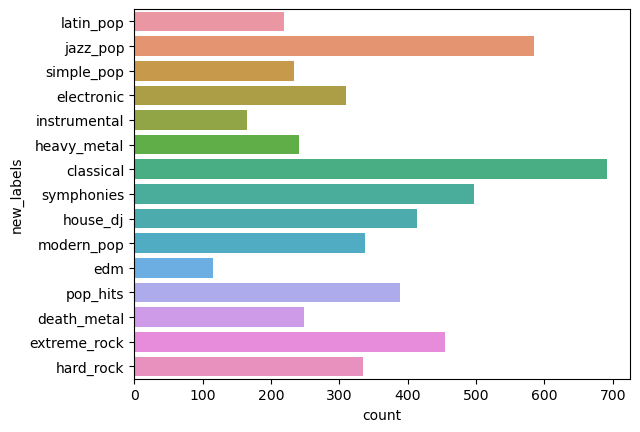

<Figure size 500x5000 with 0 Axes>

In [142]:
import seaborn as sns

# Create the count plot
sns.countplot(y='new_labels', data=df_to_plot)
# Set the size of the plot
plt.figure(figsize=(5,50))

# Show the plot
plt.show()
